## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

## <span style="color:blue">Alunos</span>

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

In [37]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [38]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
x_train[0].shape

(28, 28)

In [40]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [41]:
# What is the corresponding label in the training set?
y_train[333]

8

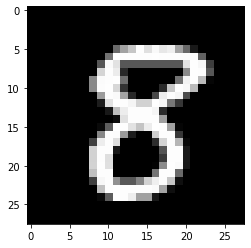

In [42]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [43]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [44]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [45]:
# convert class vectors to binary class matrices

num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [46]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [47]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

C:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [49]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 6s 6ms/step - loss: 0.5108 - accuracy: 0.8460 - val_loss: 0.2135 - val_accuracy: 0.9356
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2560 - accuracy: 0.9251 - val_loss: 0.1543 - val_accuracy: 0.9541
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2061 - accuracy: 0.9390 - val_loss: 0.1355 - val_accuracy: 0.9590
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1748 - accuracy: 0.9482 - val_loss: 0.1102 - val_accuracy: 0.9664
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1571 - accuracy: 0.9534 - val_loss: 0.1122 - val_accuracy: 0.9661
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1452 - accuracy: 0.9565 - val_loss: 0.0984 - val_accuracy: 0.9701
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1385 - accuracy: 0.9597 - val_loss: 0.0998 - val_accuracy: 0.9695
Epoch 

In [50]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10509263724088669
Test accuracy: 0.9782000184059143


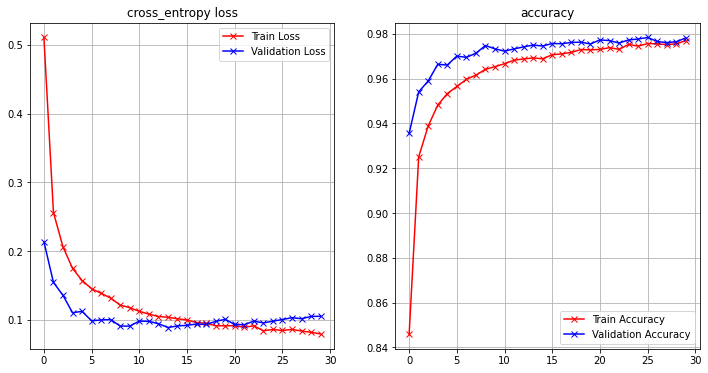

In [51]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [56]:
### Build your model here
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_train[333] 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [57]:
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [58]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               314000    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               120300    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [59]:
from keras.utils.vis_utils import plot_model

plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

-- How many parameters does your model have?  How does it compare with the previous model?
<p>
O modelo tem 437310 parâmetros, enquanto o modelo anterior possuía 55050 parâmetros. O novo modelo tem quase 8 vezes mais parâmetros que o primeiro. Isto fará com que o modelo demande mais tempo para calcular o gradiente e atualizar os pesos.

param_number = output_channel_number * (input_channel_number + 1)

400*(784+1)=314000    
300*(400+1)=120300    
10*(300+1)=3010      
</p>

<span style="color:red">---------------------------------------------------------------------------------------------</span>

In [60]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
epochs = 20
learning_rate = .001
batch_size = 128 

model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

## test set performance evaluation
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 12s 20ms/step - loss: 0.3261 - accuracy: 0.9009 - val_loss: 0.1228 - val_accuracy: 0.9618
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1512 - accuracy: 0.9554 - val_loss: 0.1019 - val_accuracy: 0.9693
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1189 - accuracy: 0.9649 - val_loss: 0.0833 - val_accuracy: 0.9750
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1019 - accuracy: 0.9713 - val_loss: 0.0814 - val_accuracy: 0.9770
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0920 - accuracy: 0.9738 - val_loss: 0.0821 - val_accuracy: 0.9775
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0839 - accuracy: 0.9754 - val_loss: 0.0790 - val_accuracy: 0.98029 - accuracy: 
Epoch 7/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0782 - accuracy: 0.9780 - val_loss: 0.0817 - va

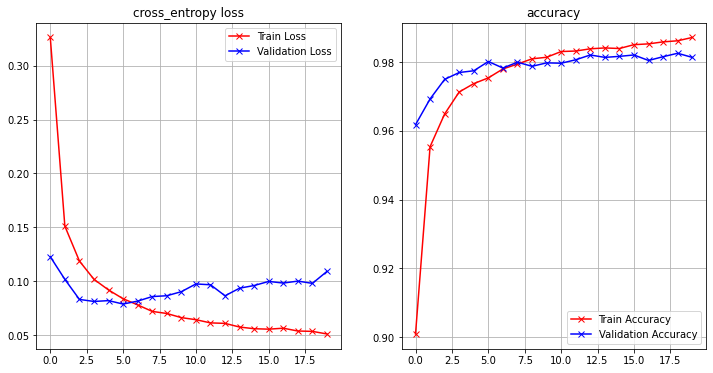

In [61]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?

<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

<p><span style="color:red">1 - </span>
Ambos os modelos possuem taxa de aprendizado de 0.001. A quantidade de épocas do modelo 2 foi menor que a do modelo 1, 20 e 30, respectivamente. A taxa de dropout do modelo 2 é o dobro do modelo 1. Apesar do menor número de épocas e uma taxa maior dropout, o modelo 2 é consideravelmente mais lento que o modelo 1, tendo em vista que possui uma quantidade de parâmetros muito maior.
Com relação à acurácia da validação e do teste, a melhora no modelo 2 foi muito pequena em relação ao modelo 1. Tendo em vista o ganho irrisório em relação ao modelo 1, para produção, achamos conveniente adotar o modelo 1, que é mais rápido e produz praticamente os mesmos resultados em termos de acurácia e loss.

|-             |loss          |accuracy      |
|------------- | ------------ | -------------|
|test - model 1|0.105092637241|0.978200018406|
|test - model 2|0.109258480370|0.981400012969|
</p>

<span style="color:red">---------------------------------------------------------------------------------------------</span>

MODEL 1


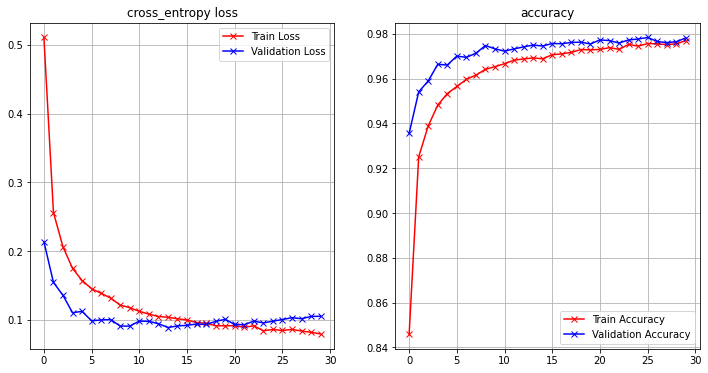

In [65]:
print('MODEL 1')
plot_loss_accuracy(history)

MODEL 2


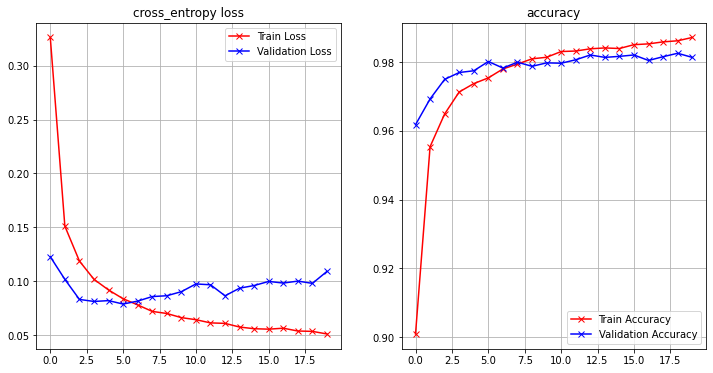

In [66]:
print('MODEL 2')
plot_loss_accuracy(history_2)

<span style="color:red">---------------------------------------------------------------------------------------------</span>

<p><span style="color:red">2 - </span>
No modelo 1, a validação apresentou perdas menores que o teste, sendo que apresentou ligeiro crescimento na época 4 e voltou a cair na época 5. Na época 10, apresentou outro crescimento. Isto pode indicar overfitting. Com relação à acurácia, a validação do modelo 1 apresentou um desenvolvimento ao longo das épocas com valores maiores que no teste, mas na última época os valores foram muito próximos.
No modelo 2, a validação inicialmente apresentou perdas menores que o teste, mas a partir da época 6 (inclusive), a perda apresentou crescimento, o que pode indicar overfitting também. Com relação à acurácia, a validação do modelo 1 apresentou para épocas <= 5 valores maiores que o teste. Como o modelo 2 possui mais parâmetros, o aprendizado é mais rápido, sendo o indício de overfitting apresentado nas primeiras épocas. 
A perda indica o quao mal ou bem o modelo se comporta a cada época, enquanto a acurácia indica o desempenho de maneira mais geral (e mais fácil de interpretar). A análise da perda traz mais informações que apenas analisar a acurácia, sendo, portanto, mais importante.
</p>

<span style="color:red">---------------------------------------------------------------------------------------------</span>

In [67]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_train[333] 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [68]:
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))

In [72]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
epochs = 10
learning_rate = .001
batch_size = 128 

model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

## test set performance evaluation
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.3240 - accuracy: 0.9001 - val_loss: 0.1328 - val_accuracy: 0.9579
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1531 - accuracy: 0.9545 - val_loss: 0.0905 - val_accuracy: 0.9718
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.0864 - val_accuracy: 0.9752
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1009 - accuracy: 0.9706 - val_loss: 0.0782 - val_accuracy: 0.9786
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0918 - accuracy: 0.9735 - val_loss: 0.0770 - val_accuracy: 0.9785
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0850 - accuracy: 0.9767 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0787 - accuracy: 0.9769 - val_loss: 0.0775 - val_accuracy: 0.97

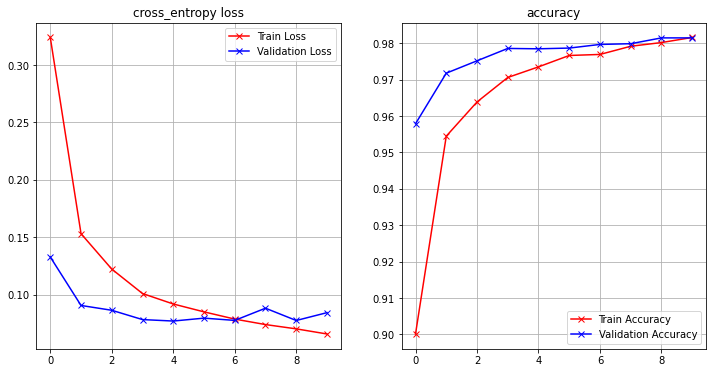

In [73]:
plot_loss_accuracy(history_3)

<p><span style="color:red">3 - parte 1</span>
Houve melhora no tempo de execução do modelo, tomando para comparação o modelo 2. Os valores de acurácia e loss obtidos também foram melhores no modelo 3.</p>

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.3145 - accuracy: 0.9092 - val_loss: 0.1468 - val_accuracy: 0.9569
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1469 - accuracy: 0.9564 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1128 - accuracy: 0.9668 - val_loss: 0.0842 - val_accuracy: 0.9746
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0911 - accuracy: 0.9718 - val_loss: 0.0776 - val_accuracy: 0.9761
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0788 - accuracy: 0.9766 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0712 - val_accuracy: 0.9794

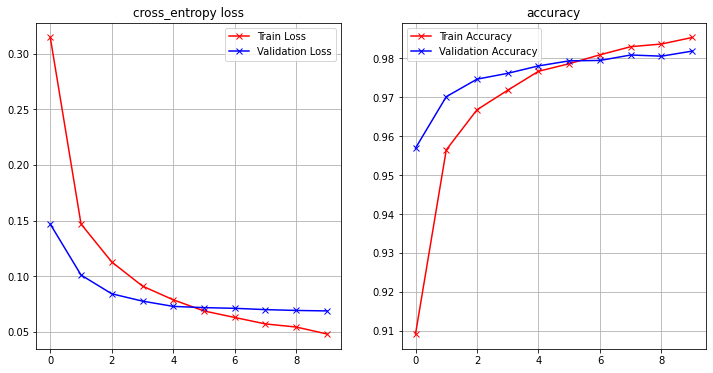

In [82]:
model_4 = Sequential()
model_4.add(Dense(400, activation='relu', input_shape=(784,)))
model_4.add(Dropout(0.4))
model_4.add(Dense(10, activation='softmax'))

epochs = 10
learning_rate = .001
batch_size = 128 

model_4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

history_4 = model_4.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

## test set performance evaluation
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_loss_accuracy(history_4)

<p><span style="color:red">3 - parte 2</span>
Executamos mais um modelo, modelo 4, onde reduzimos a quantidade de épocas para 10 para tornar o processo menos moroso. Além disso, removemos um layer, o de size 300. Assim, obtivemos um valor para acurácia ligeiramente maior e sem indicativo de overfitting no gráfico de perda.
</p>